# Learn 2

#### 1- Building your First Neural Network on a Structured Dataset (using Keras)

https://medium.com/analytics-vidhya/build-your-first-neural-network-model-on-a-structured-dataset-using-keras-d9e7de5c6724

#### 2- Guide for creating CNN model using CSV file

https://www.kaggle.com/vishwasgpai/guide-for-creating-cnn-model-using-csv-file

## 1- Building your First Neural Network on a Structured Dataset (using Keras) 

### (Predict the purchase amount of a customer against various products)

### Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [79]:
train = pd.read_csv("train_black_friday.csv")
test = pd.read_csv("test_black_friday.csv")

In [80]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Combined both Train and Test Data set to do preprocessing together and set flag for both as well

In [81]:
train['Type']='Train'
test['Type']='Test'
fullData=pd.concat([train,test],axis=0)

C:\Users\Fatah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
fullData.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,Type,User_ID
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,Train,1000001
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,Train,1000001
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,Train,1000001
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,Train,1000001
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,Train,1000002


In [83]:
fullData.tail()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,Type,User_ID
233594,26-35,B,F,1,15,8,NaN,NaN,P00118942,NaN,4+,Test,1006036
233595,26-35,B,F,1,15,5,8.0,NaN,P00254642,NaN,4+,Test,1006036
233596,26-35,B,F,1,15,1,5.0,12.0,P00031842,NaN,4+,Test,1006036
233597,46-50,C,F,0,1,10,16.0,NaN,P00124742,NaN,4+,Test,1006037
233598,46-50,B,F,1,0,4,5.0,NaN,P00316642,NaN,4+,Test,1006039


##### imput missing values
Methods to treat missing values for categorical and continuous variables will be different.

In [84]:
#Identifying ID, Categorical
ID_col = ['User_ID','Product_ID']
flag_col= ['Type']
target_col = ["Purchase"]
cat_cols= ['Gender','Age','City_Category','Stay_In_Current_City_Years']
num_cols= list(set(list(fullData.columns))-set(cat_cols)-set(ID_col)-set(target_col)-set(flag_col))

# Combined numerical and Categorical variables
num_cat_cols = num_cols+cat_cols
num_cat_cols

['Product_Category_3',
 'Product_Category_2',
 'Marital_Status',
 'Occupation',
 'Product_Category_1',
 'Gender',
 'Age',
 'City_Category',
 'Stay_In_Current_City_Years']

In [85]:
#Create a new variable for each variable having missing value with VariableName_NA 
# and flag missing value with 1 and other with 0

for var in num_cat_cols:
    if fullData[var].isnull().any()==True:        
        fullData[var+'_NA']=fullData[var].isnull()*1
        
#Impute numerical missing values with mean
fullData[num_cols] = fullData[num_cols].fillna(fullData[num_cols].mean())

#Impute categorical missing values with -9999
fullData[cat_cols] = fullData[cat_cols].fillna(value = -9999)

Treat Categorical Values: We will create a label encoder for categorical variables.

In [86]:
#create label encoders for categorical features
from sklearn.preprocessing import LabelEncoder
for var in cat_cols:
    number = LabelEncoder()
    fullData[var] = number.fit_transform(fullData[var].astype('str'))

Normalize Data: Scale (normalize) the independent variables between 0 and 1. It will help us to converge comparatively faster.

In [88]:
print(fullData.dtypes)


Age                             int32
City_Category                   int32
Gender                          int32
Marital_Status                  int64
Occupation                      int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Product_ID                     object
Purchase                      float64
Stay_In_Current_City_Years      int32
Type                           object
User_ID                         int64
Product_Category_3_NA           int32
Product_Category_2_NA           int32
dtype: object


In [89]:
#J'ai rajouté moi-meme le set(['Type']) car il y avait une erreur de 'str'
features = list(set(list(fullData.columns))-set(ID_col)-set(target_col)-set(flag_col))
print(set(target_col))
print(features)
fullData[features] = fullData[features]/fullData[features].max()

{'Purchase'}
['Age', 'Product_Category_3', 'Gender', 'Stay_In_Current_City_Years', 'Product_Category_2', 'Product_Category_3_NA', 'Product_Category_2_NA', 'Marital_Status', 'City_Category', 'Occupation', 'Product_Category_1']


In [90]:
fullData.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,Type,User_ID,Product_Category_3_NA,Product_Category_2_NA
0,0.0,0.0,0.0,0.0,0.5,0.15,0.546917,0.703811,P00069042,8370.0,0.5,Train,1000001,1.0,1.0
1,0.0,0.0,0.0,0.0,0.5,0.05,0.333333,0.777778,P00248942,15200.0,0.5,Train,1000001,0.0,0.0
2,0.0,0.0,0.0,0.0,0.5,0.60,0.546917,0.703811,P00087842,1422.0,0.5,Train,1000001,1.0,1.0
3,0.0,0.0,0.0,0.0,0.5,0.60,0.777778,0.703811,P00085442,1057.0,0.5,Train,1000001,1.0,0.0
4,1.0,1.0,1.0,0.0,0.8,0.40,0.546917,0.703811,P00285442,7969.0,1.0,Train,1000002,1.0,1.0


In [91]:
#Create a validation set
from sklearn.model_selection import train_test_split

train=fullData[fullData['Type']=='Train']
test=fullData[fullData['Type']=='Test']

In [92]:
train.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,Type,User_ID,Product_Category_3_NA,Product_Category_2_NA
0,0.0,0.0,0.0,0.0,0.5,0.15,0.546917,0.703811,P00069042,8370.0,0.5,Train,1000001,1.0,1.0
1,0.0,0.0,0.0,0.0,0.5,0.05,0.333333,0.777778,P00248942,15200.0,0.5,Train,1000001,0.0,0.0
2,0.0,0.0,0.0,0.0,0.5,0.60,0.546917,0.703811,P00087842,1422.0,0.5,Train,1000001,1.0,1.0
3,0.0,0.0,0.0,0.0,0.5,0.60,0.777778,0.703811,P00085442,1057.0,0.5,Train,1000001,1.0,0.0
4,1.0,1.0,1.0,0.0,0.8,0.40,0.546917,0.703811,P00285442,7969.0,1.0,Train,1000002,1.0,1.0


In [94]:
test.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,Type,User_ID,Product_Category_3_NA,Product_Category_2_NA
0,0.666667,0.5,1.0,1.0,0.35,0.05,0.611111,0.703811,P00128942,NaN,0.50,Test,1000004,1.0,0.0
1,0.333333,1.0,1.0,0.0,0.85,0.15,0.277778,0.703811,P00113442,NaN,0.00,Test,1000009,1.0,0.0
2,0.500000,0.5,0.0,1.0,0.05,0.25,0.777778,0.703811,P00288442,NaN,1.00,Test,1000010,1.0,0.0
3,0.500000,0.5,0.0,1.0,0.05,0.20,0.500000,0.703811,P00145342,NaN,1.00,Test,1000010,1.0,0.0
4,0.333333,1.0,0.0,0.0,0.05,0.20,0.277778,0.666667,P00053842,NaN,0.25,Test,1000011,0.0,0.0


In [107]:
#Avoir X ( les features) et Y (la prédiction)
X = train[features].values
y = train[target_col].values

print(X)
print(len(X),' ', len(y))

[[0.         0.70381138 0.         ... 0.         0.5        0.15      ]
 [0.         0.77777778 0.         ... 0.         0.5        0.05      ]
 [0.         0.70381138 0.         ... 0.         0.5        0.6       ]
 ...
 [0.33333333 0.70381138 0.         ... 0.5        0.75       1.        ]
 [1.         0.70381138 0.         ... 1.         0.05       1.        ]
 [0.66666667 0.70381138 0.         ... 0.5        0.         1.        ]]
550068   550068


In [108]:
#Appeler la fonction qui fait le split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=42)

In [112]:
X_train.shape #ou len(X_train)

(385047, 11)

On a 11 features

## Model Building using Deep Learning Model (Keras)

la fonction d'activation de sortie par défaut est lineaire donc pas besoin d'en préciser une vu que c'est ce qu'on veut avoir

In [116]:
from keras.models import Sequential
from keras.layers import Input, Dense

In [117]:
model = Sequential()
model.add(Dense(100, input_dim=11, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1200      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 6,301
Trainable params: 6,301
Non-trainable params: 0
_________________________________________________________________


#### Voir le modèle

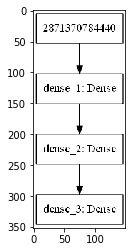

In [120]:
from keras.utils import plot_model
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plot_model(model, to_file='model.png')

image = mpimg.imread("model.png")
plt.imshow(image)

In [121]:
# Compile model
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [124]:
# Evaluation while fitting the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 385047 samples, validate on 165021 samples
Epoch 1/10
385047/385047 [==============================] - 30s 77us/step - loss: 17678679.4446 - mean_squared_error: 17678679.4446 - val_loss: 17706561.0700 - val_mean_squared_error: 17706561.0700
Epoch 2/10
385047/385047 [==============================] - 30s 79us/step - loss: 17678404.6690 - mean_squared_error: 17678404.6690 - val_loss: 17700002.2420 - val_mean_squared_error: 17700002.2420
Epoch 3/10
385047/385047 [==============================] - 31s 80us/step - loss: 17677102.0418 - mean_squared_error: 17677102.0418 - val_loss: 17698190.0680 - val_mean_squared_error: 17698190.0680
Epoch 4/10
385047/385047 [==============================] - 33s 85us/step - loss: 17677656.1421 - mean_squared_error: 17677656.1421 - val_loss: 17712642.7513 - val_mean_squared_error: 17712642.7513
Epoch 5/10
385047/385047 [==============================] - 32s 84us/step - loss: 17675158.2724 - mean_squared_error: 17675158.2724 - val_loss: 17746719.978

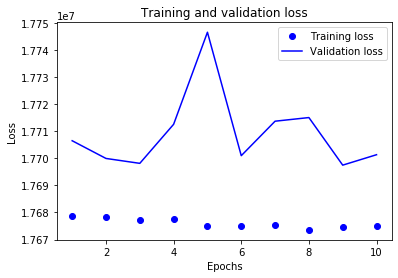

In [126]:
# Plotting train and validation loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
# “bo” is for “blue dot”
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for “solid blue line”
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [130]:
#Evaluating 

from sklearn.metrics import mean_squared_error

pred= model.predict(X_valid)
score = np.sqrt(mean_squared_error(y_valid,pred))
print (score)

4207.301432614831


In [135]:
#Prediction
# Dans le fichier test, il n y a pas les valeurs de Y à prédire pour comparer
X_test = test[features].values
y_test_prediction = model.predict(X_test)
y_test_prediction


array([[13454.449 ],
       [ 9197.694 ],
       [ 7106.5195],
       ...,
       [13695.9375],
       [ 8091.401 ],
       [ 7104.255 ]], dtype=float32)

## 2- Guide for creating CNN model using CSV file

#### lien du tutoriel: https://www.kaggle.com/vishwasgpai/guide-for-creating-cnn-model-using-csv-file

#### Step 1 : Importing the required libraries.

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras import backend as K



In [29]:
# Read training and test data files
train = pd.read_csv("fashion-mnist_train.csv")
test  = pd.read_csv("fashion-mnist_test.csv")
train.shape

(60000, 785)

In [30]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
train=train.values
test=test.values
train

array([[2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
# Reshape and normalize training data
trainX = train[:, 1:].reshape(train.shape[0],1,28, 28).astype( 'float32' )
X_train = trainX / 255.0

y_train = train[:,0]

# Reshape and normalize test data
testX = test[:,1:].reshape(test.shape[0],1, 28, 28).astype( 'float32' )
X_test = testX / 255.0

y_test = test[:,0]

In [15]:
#labelBinarizer (like onehot encoder and labeled encoder)

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [16]:
#build the model 
model = Sequential()
K.set_image_dim_ordering('th')
model.add(Convolution2D(30, 5, 5, border_mode= 'valid' , input_shape=(1, 28, 28),activation= 'relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(15, 3, 3, activation= 'relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation= 'relu' ))
model.add(Dense(50, activation= 'relu' ))
model.add(Dense(10, activation= 'softmax' ))

# Compile model
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

C:\Users\Fatah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (5, 5), input_shape=(1, 28, 28..., activation="relu", padding="valid")`
  after removing the cwd from sys.path.
C:\Users\Fatah\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
  


In [18]:
#train the model
history=model.fit(X_train, y_train,  epochs=20, batch_size= 160, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 114s 2ms/step - loss: 0.5968 - acc: 0.7732 - val_loss: 0.4598 - val_acc: 0.8260
Epoch 2/20
54000/54000 [==============================] - 120s 2ms/step - loss: 0.4357 - acc: 0.8404 - val_loss: 0.3801 - val_acc: 0.8640
Epoch 3/20
54000/54000 [==============================] - 121s 2ms/step - loss: 0.3810 - acc: 0.8596 - val_loss: 0.3405 - val_acc: 0.8773
Epoch 4/20
54000/54000 [==============================] - 110s 2ms/step - loss: 0.3525 - acc: 0.8702 - val_loss: 0.3205 - val_acc: 0.8850
Epoch 5/20
54000/54000 [==============================] - 104s 2ms/step - loss: 0.3308 - acc: 0.8785 - val_loss: 0.3054 - val_acc: 0.8893
Epoch 6/20
54000/54000 [==============================] - 103s 2ms/step - loss: 0.3148 - acc: 0.8839 - val_loss: 0.3054 - val_acc: 0.8873
Epoch 7/20
54000/54000 [==============================] - 106s 2ms/step - loss: 0.3028 - acc: 0.8876 - val_loss: 0.3106 - v

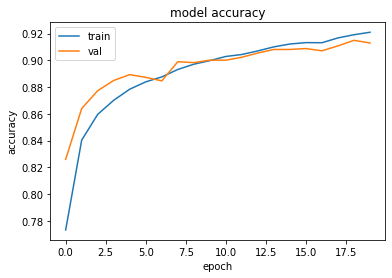

In [23]:
#ploting accuracy 

from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

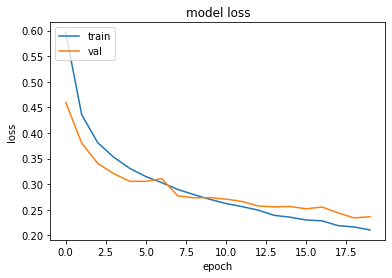

In [24]:
#ploting loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
#evaluation
score = model.evaluate(X_test, y_test, batch_size=128)
score

10000/10000 [==============================] - 9s 922us/step


[0.23352910957336426, 0.9117]